In [2]:
import pandas as pd
dataset=pd.read_csv('./export/dataset.csv',index_col=0)

In [76]:
w_data=pd.read_csv('./export/q2_3往期0701-0707的W分析(未打折).csv',index_col=0)
q_data=pd.read_csv('./export/q2_3往期0701-0707的Q分析(未打折).csv',index_col=0)

In [91]:
df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')
df['分类名称'].unique()

array(['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌'], dtype=object)

In [187]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import TimeSeriesSplit

# 读取数据集
data = df[df['分类名称']=='花叶类'].copy()
# 选择需要预测的列
columns = ['销量(千克)_否']
data = data[columns]

# 将数据转换为numpy数组
X = np.array(data)

# 定义交叉验证器
tscv = TimeSeriesSplit(n_splits=5)

# 训练模型并评估精度
scores = []
for train_index, test_index in tscv.split(X):
    # 划分训练集和测试集
    X_train, X_test = X[train_index], X[test_index]

    # 训练模型
    model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)
    model.fit(X_train)

    # 预测测试集
    predicted_data = model.predict(X_test)

    # 计算精度
    score = model.score(X_test)
    scores.append(score)

# 输出平均精度
print('Average score:', np.mean(scores))

# 预测未来一周的数据
start_date = pd.Timestamp('2023-07-01')
end_date = pd.Timestamp('2023-07-07')
num_days = (end_date - start_date).days + 1
predicted_data = model.sample(num_days)[0]

# 将预测结果转换为DataFrame
predicted_data = pd.DataFrame(predicted_data, columns=columns)
predicted_data['日期'] = pd.date_range(start_date, end_date)

# 输出预测结果
display(predicted_data)

Average score: -1077.6545874619558


,销量(千克)_否,日期
0,95.215899,2023-07-01
1,150.750425,2023-07-02
2,207.966389,2023-07-03
3,193.739639,2023-07-04
4,187.194390,2023-07-05
5,196.359962,2023-07-06
6,215.225717,2023-07-07


In [45]:
df['日期'] = pd.to_datetime(df['日期'])
mask = (
        ((df['日期'] >= '2021-06-01') & (df['日期'] <= '2021-07-07')) |
        ((df['日期'] >= '2022-06-01') & (df['日期'] <= '2022-07-07')) |
        ((df['日期'] >= '2023-06-01') & (df['日期'] <= '2023-06-30'))
       )
df = df.loc[mask]
df=df.set_index(['日期'])

水生根茎类t统计量的值为: 10.513299712622164
多项式系数为: [ 4.30342460e-04 -5.43349415e-02  7.62770395e+00]
花叶类t统计量的值为: 2.6589509037564256
多项式系数为: [-1.90395277e-05  4.90388483e-03  3.61990834e+00]
花菜类t统计量的值为: 8.586614499686169
多项式系数为: [ 7.62224778e-05 -2.69568682e-02  6.98732725e+00]
茄类t统计量的值为: 20.91113267954643
多项式系数为: [ 1.05054800e-03 -1.00195596e-01  7.20218556e+00]
辣椒类t统计量的值为: 9.55149334686668
多项式系数为: [ 1.81133934e-04 -6.04960338e-02  9.79218679e+00]
食用菌t统计量的值为: 6.424837270989514
多项式系数为: [ 3.14543524e-05 -1.51710195e-02  8.44934928e+00]


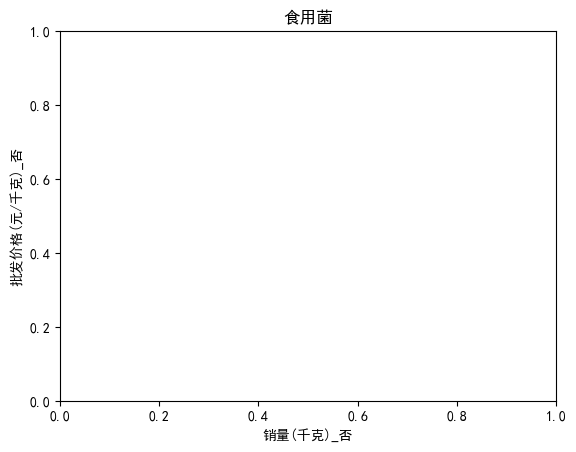

In [219]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 不打折
df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总(去除离群值).csv')

df['日期'] = pd.to_datetime(df['日期'])
mask = (
     ((df['日期'] >= '2023-06-01') & (df['日期'] <= '2023-06-30'))
    )
#df = df.loc[mask]
df=df.set_index(['日期'])

for typ in df['分类名称'].unique():
    df0=df[df['分类名称']==typ].copy()
    
    # 计算权重
    df0['weights'] = df0['销量(千克)_否'] / total_sales
    
    # 绘制散点图
    plt.scatter(df0['销量(千克)_否'].values, df0['批发价格(元/千克)_否'].values,alpha=df0['weights'].values/df0['weights'].max())
    plt.xlabel('销量(千克)_否')
    plt.ylabel('批发价格(元/千克)_否')
    plt.title(typ)
    
    # 计算总销量
    total_sales = df0['销量(千克)_否'].sum()    
    
    # 多项式拟合
    x = df0['销量(千克)_否'].values
    y = df0['批发价格(元/千克)_否'].values
    weights = df0['weights'].values
    z = np.polyfit(x, y, 2, w=weights)
    p = np.poly1d(z)
    df0['SSx'] =(df0['批发价格(元/千克)_否'] -df0['批发价格(元/千克)_否'].mean())**2
    df0['ssxy'] = (df0['批发价格(元/千克)_否'] -df0['批发价格(元/千克)_否'].mean())*(df0['销量(千克)_否']-df0['销量(千克)_否'].mean())
    b1 = df0['SSx'].sum()/df0['ssxy'].sum()
    s =  (df0['SSx'].mean()/df0['SSx'].sum())**0.5
    t = (z[0]-b1)/s
    print(f"{typ}t统计量的值为: {t}")
    print(f"多项式系数为: {z}")
    
    # 画出拟合线
    xp = np.linspace(x.min(), x.max(), 100)
    plt.plot(xp, p(xp), color='red')
    plt.show()
    
    result=pd.concat([result,df0],axis=0)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

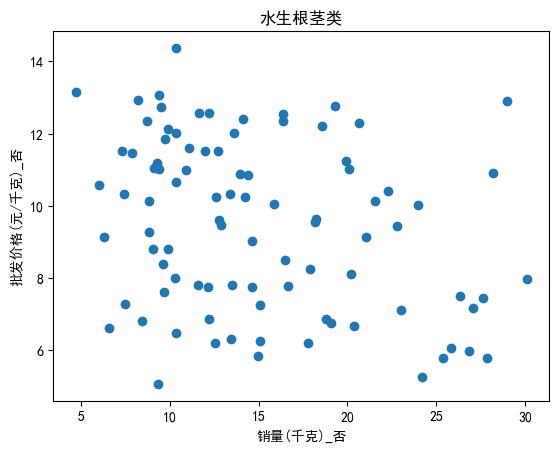

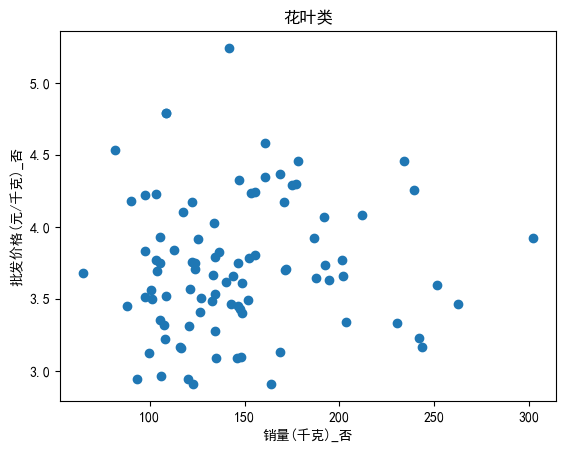

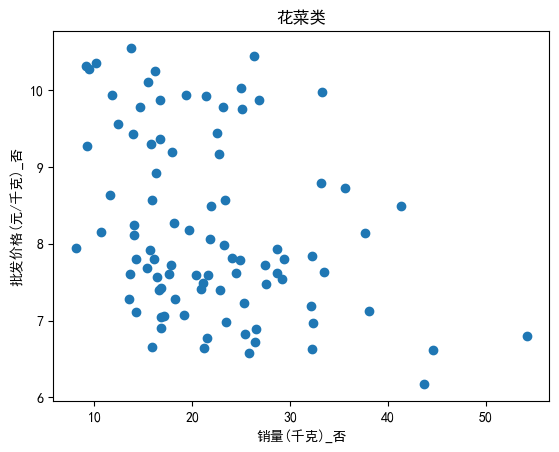

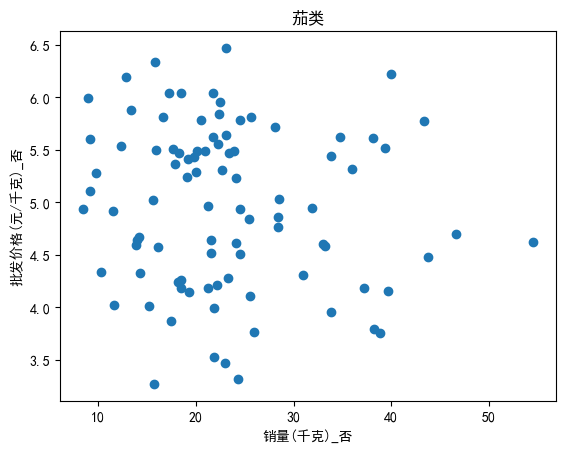

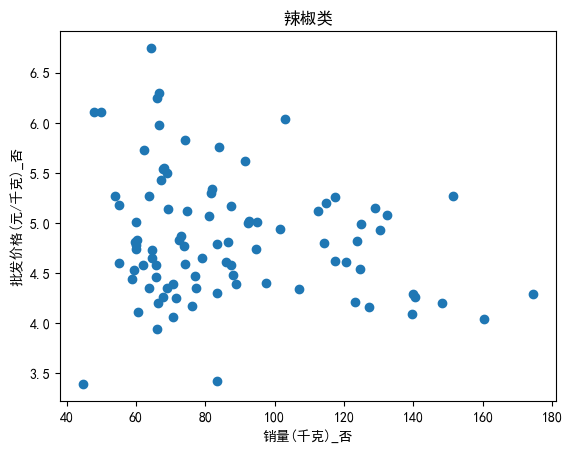

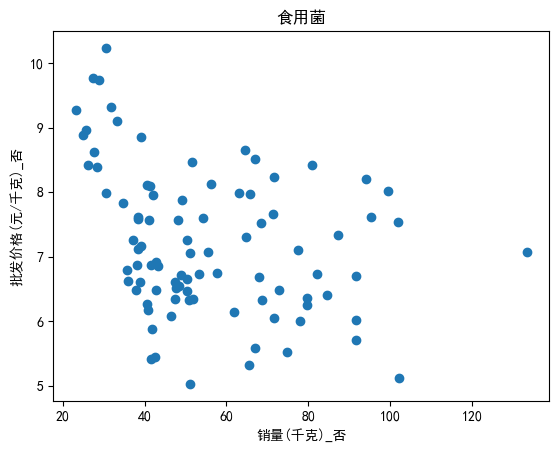

In [190]:
df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')

df['日期'] = pd.to_datetime(df['日期'])
mask = (
        ((df['日期'] >= '2023-04-01') & (df['日期'] <= '2023-06-30'))
       )
df = df.loc[mask]
df=df.set_index(['日期'])

result=pd.DataFrame(columns=['分类名称', '批发价格(元/千克)_否', '批发价格(元/千克)_是', '销售单价(元/千克)_否', '销售单价(元/千克)_是',
       '销量(千克)_否', '销量(千克)_是', '销量_zscore', '销售单价_zscore'])

for typ in df['分类名称'].unique():
    df0=df[df['分类名称']==typ]

    # 绘制散点图
    plt.scatter(df0['销量(千克)_否'].values, df0['批发价格(元/千克)_否'].values)
    plt.xlabel('销量(千克)_否')
    plt.ylabel('批发价格(元/千克)_否')
    plt.title(typ)
    plt.show()
    result=pd.concat([result,df0],axis=0)

In [199]:
import statsmodels.api as sm

df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')

df['日期'] = pd.to_datetime(df['日期'])
mask = (
     ((df['日期'] >= '2023-04-01') & (df['日期'] <= '2023-06-30'))
    )
df = df.loc[mask]
df=df.set_index(['日期'])
# 计算总销量
total_sales = df['销量(千克)_否'].sum()

# 计算权重
df['weights'] = df['销量(千克)_否'] / total_sales
df

,分类名称,批发价格(元/千克)_否,批发价格(元/千克)_是,销售单价(元/千克)_否,销售单价(元/千克)_是,销量(千克)_否,销量(千克)_是,weights
日期,,,,,,,,
2023-04-01,水生根茎类,5.982927,0.000000,10.190244,0.000000,26.836,0.000,0.000845
2023-04-01,花叶类,4.297480,3.026875,6.316000,3.731250,177.142,31.235,0.005580
2023-04-01,花菜类,7.636667,7.710000,10.933333,6.500000,33.443,1.636,0.001053
2023-04-01,茄类,5.470189,0.000000,8.490566,0.000000,23.388,0.000,0.000737
2023-04-01,辣椒类,5.077960,7.830000,7.186070,6.326667,132.370,22.517,0.004170
...,...,...,...,...,...,...,...,...
2023-06-30,花叶类,2.942873,3.499231,4.991160,4.561538,120.104,10.360,0.003783
2023-06-30,花菜类,7.820769,8.390000,11.719231,10.111111,24.080,4.007,0.000759
2023-06-30,茄类,4.934468,0.000000,8.502128,0.000000,24.530,0.000,0.000773


水生根茎类t统计量的值为: -0.351494987652726


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,16.260870,9.741,0.022870
2023-06-02,16.240000,11.988,0.028145
2023-06-03,15.650847,28.183,0.066168
2023-06-04,13.565957,21.047,0.049414
2023-06-05,14.016667,12.580,0.029535


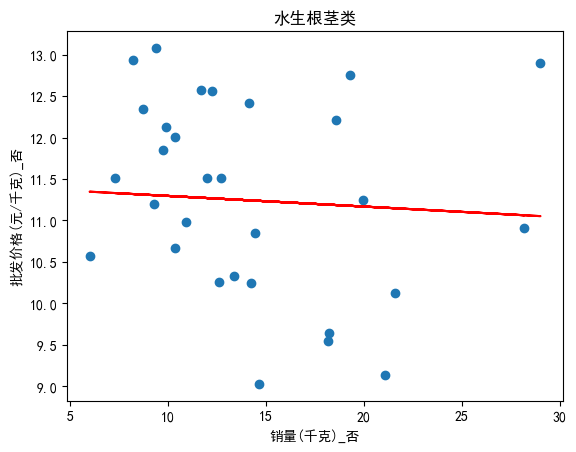

花叶类t统计量的值为: 0.17248379157116578


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,5.668878,123.982,0.030178
2023-06-02,5.790179,144.142,0.035085
2023-06-03,6.005363,202.081,0.049188
2023-06-04,5.795440,201.285,0.048994
2023-06-05,6.188182,125.623,0.030577


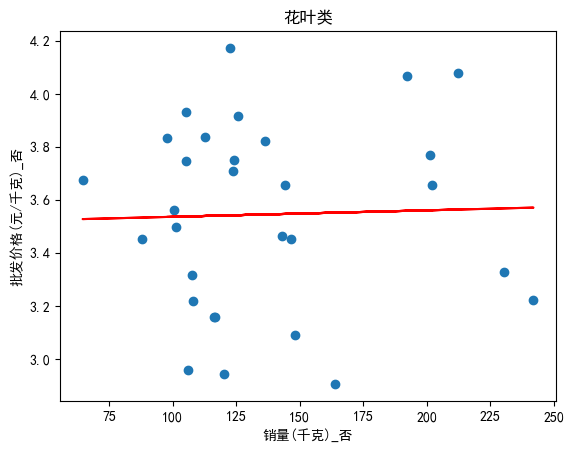

花菜类t统计量的值为: 0.8553818957257907


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,13.702128,19.364,0.036856
2023-06-02,13.836735,16.172,0.030780
2023-06-03,13.814815,33.243,0.063272
2023-06-04,13.904762,25.117,0.047805
2023-06-05,13.750000,22.570,0.042958


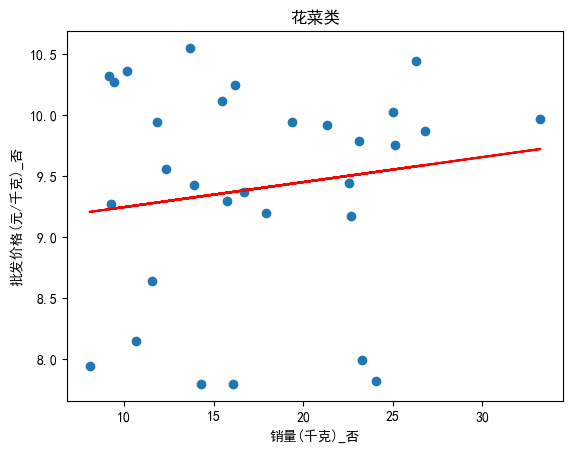

茄类t统计量的值为: -0.46018072520350994


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,9.413333,18.475,0.024015
2023-06-02,9.174545,22.501,0.029248
2023-06-03,9.057143,39.399,0.051213
2023-06-04,9.168421,34.741,0.045158
2023-06-05,8.495238,19.989,0.025983


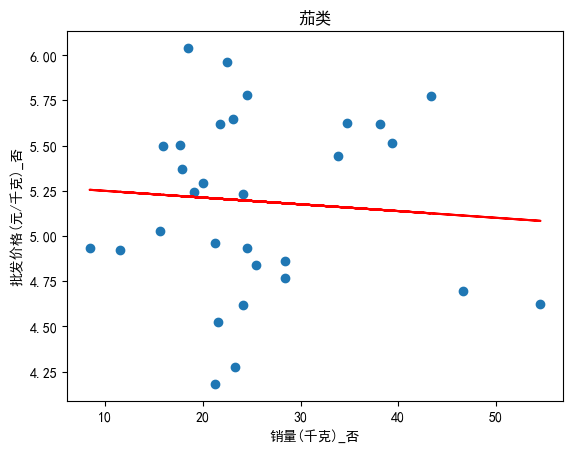

辣椒类t统计量的值为: -1.8910890378737817


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,7.444037,67.854,0.026687
2023-06-02,8.075424,72.847,0.028651
2023-06-03,7.360000,120.664,0.047457
2023-06-04,6.768528,123.177,0.048446
2023-06-05,6.189394,71.575,0.028151


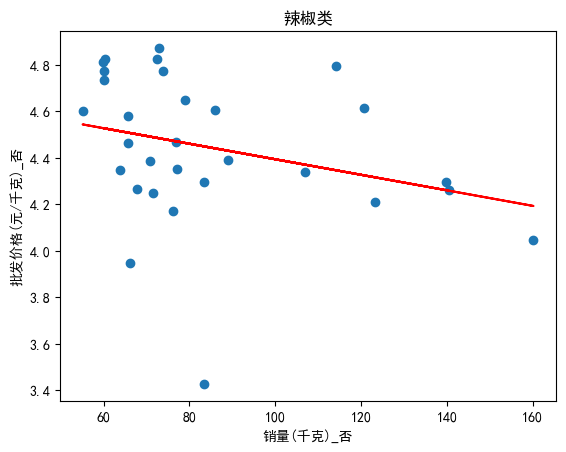

食用菌t统计量的值为: -2.0107654770161143


,销售单价(元/千克)_否,销量(千克)_否,weights
日期,,,
2023-06-01,10.801923,37.867,0.028302
2023-06-02,11.234722,50.385,0.037657
2023-06-03,11.411712,77.541,0.057954
2023-06-04,9.749505,77.926,0.058241
2023-06-05,11.617857,39.192,0.029292


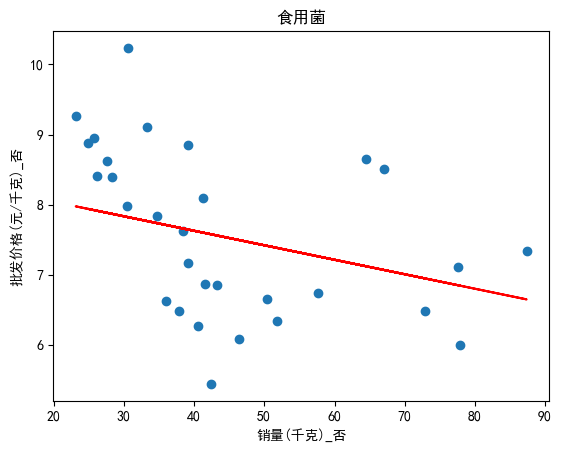

In [204]:
import statsmodels.api as sm

df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')

df['日期'] = pd.to_datetime(df['日期'])
mask = (
     ((df['日期'] >= '2023-06-01') & (df['日期'] <= '2023-06-30'))
    )
df = df.loc[mask]
df=df.set_index(['日期'])



for typ in df['分类名称'].unique():
    df0=df[df['分类名称']==typ].copy()

    # 绘制散点图
    plt.scatter(df0['销量(千克)_否'].values, df0['批发价格(元/千克)_否'].values)
    plt.xlabel('销量(千克)_否')
    plt.ylabel('批发价格(元/千克)_否')
    plt.title(typ)
    
    # 计算总销量
    total_sales = df0['销量(千克)_否'].sum()

    # 计算权重
    df0['weights'] = df0['销量(千克)_否'] / total_sales
    
    # 加权线性回归
    X = sm.add_constant(df0['销量(千克)_否'].values)
    y = df0['批发价格(元/千克)_否'].values
    weights = df0['weights']
    model = sm.WLS(y, X, weights=weights)
    results = model.fit()
    print(f"{typ}t统计量的值为: {results.tvalues[1]}")
    
    # 画出拟合线
    plt.plot(df0['销量(千克)_否'].values, results.fittedvalues, color='red')
    display(df0[['销售单价(元/千克)_否','销量(千克)_否','weights']].head())
    plt.show()
    
    result=pd.concat([result,df0],axis=0)

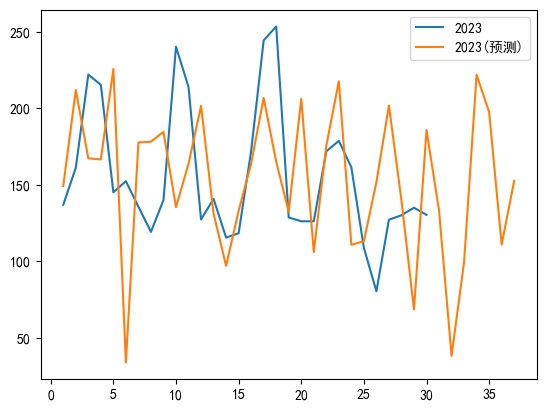

In [47]:
df0=df[df['分类名称']=='花叶类']
df0=df0.reset_index()
#tr1=(df0[df0['日期'].dt.year==2020])['销量(千克)_否']+(df0[df0['日期'].dt.year==2020])['销量(千克)_是']
tr2=(df0[df0['日期'].dt.year==2021])['销量(千克)_否']+(df0[df0['日期'].dt.year==2021])['销量(千克)_是']
tr3=(df0[df0['日期'].dt.year==2022])['销量(千克)_否']+(df0[df0['日期'].dt.year==2022])['销量(千克)_是']
tr4=(df0[df0['日期'].dt.year==2023])['销量(千克)_否']+(df0[df0['日期'].dt.year==2023])['销量(千克)_是']
#plt.plot(range(1,38),tr1.values)
#plt.plot(range(1,38),tr2.values)
#plt.plot(range(1,38),tr3.values)
plt.plot(range(1,31),tr4.values)
plt.plot(range(1,38),predicted_data['销量(千克)_否'])
plt.legend(['2023','2023(预测)'])
plt.show()

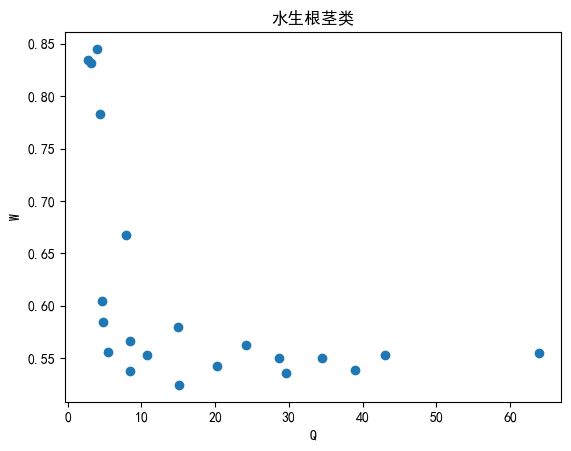

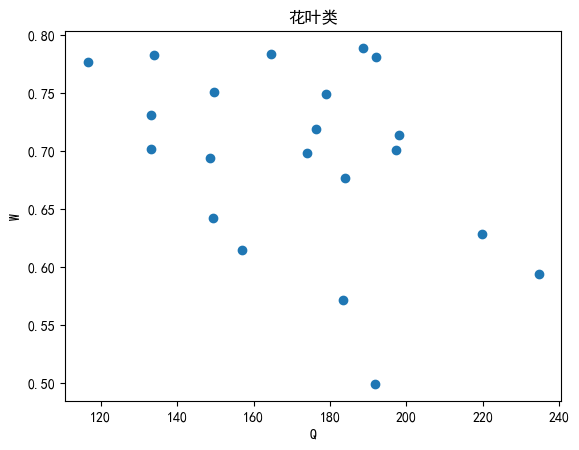

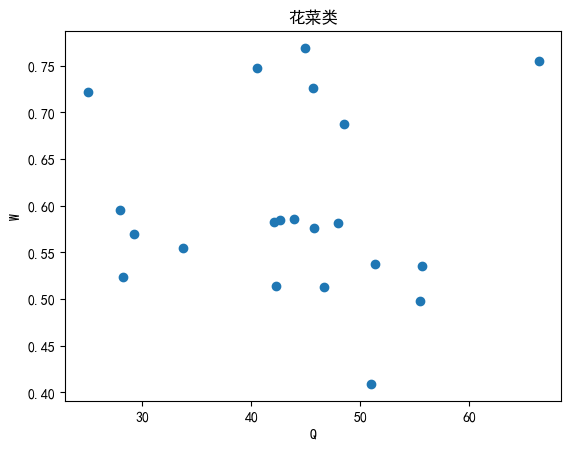

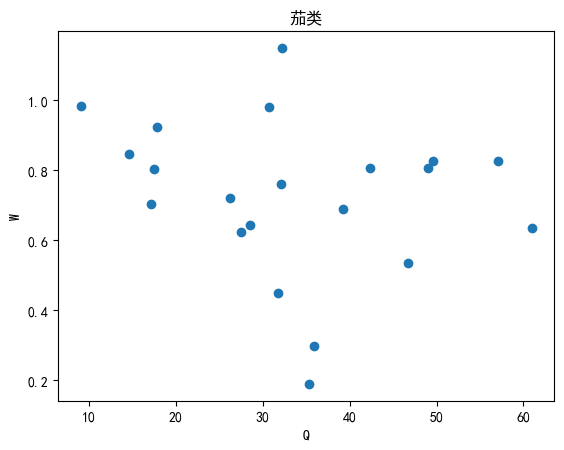

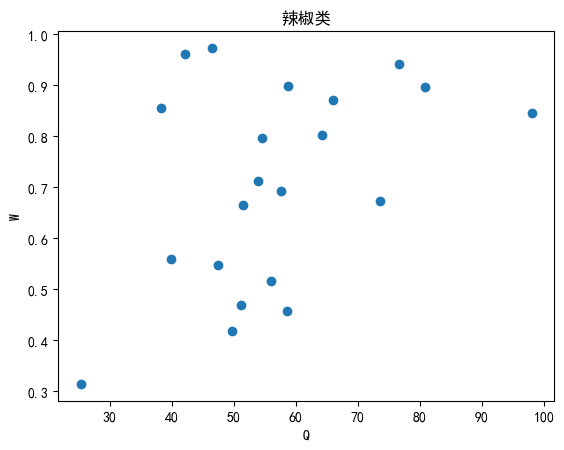

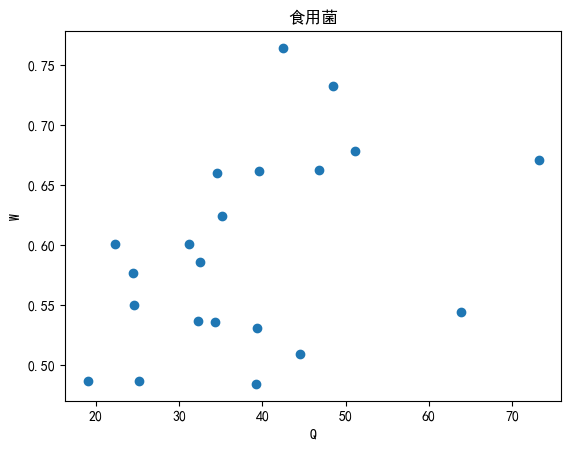

In [81]:
import pandas as pd
data = pd.read_csv('./export/q2_1往期品类批发价格汇总.csv', index_col=0)
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

for typ in df['分类名称'].unique():
    plt.title(typ)
    plt.xlabel('Q')
    plt.ylabel('W')
    plt.scatter(q_data[f'Q_{typ}'],w_data[f'W_{typ}'])
    plt.show()

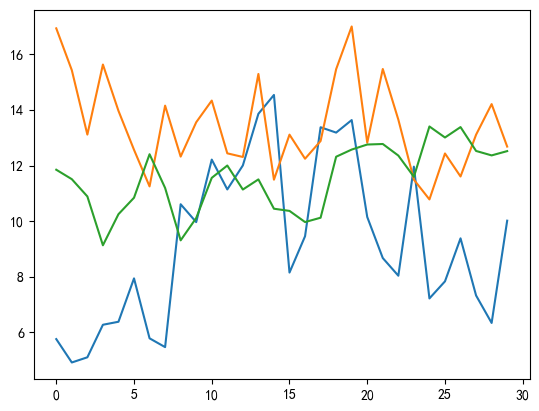

In [41]:
import pandas as pd
data = pd.read_csv('./export/q2_1往期品类批发价格汇总.csv', index_col=0)
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

data['日期']=pd.to_datetime(data['日期'])
tr1=((data.loc[(data['日期']>=pd.to_datetime('2021-06-01'))&
               (data['日期']<=pd.to_datetime('2021-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
tr2=((data.loc[(data['日期']>=pd.to_datetime('2022-06-01'))&
               (data['日期']<=pd.to_datetime('2022-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
tr3=((data.loc[(data['日期']>=pd.to_datetime('2023-06-01'))&
               (data['日期']<=pd.to_datetime('2023-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
plt.plot(range(0,30),tr1['批发价格(元/千克)'].values)
plt.plot(range(0,30),tr2['批发价格(元/千克)'].values)
plt.plot(range(0,30),tr3['批发价格(元/千克)'].values)
plt.show()

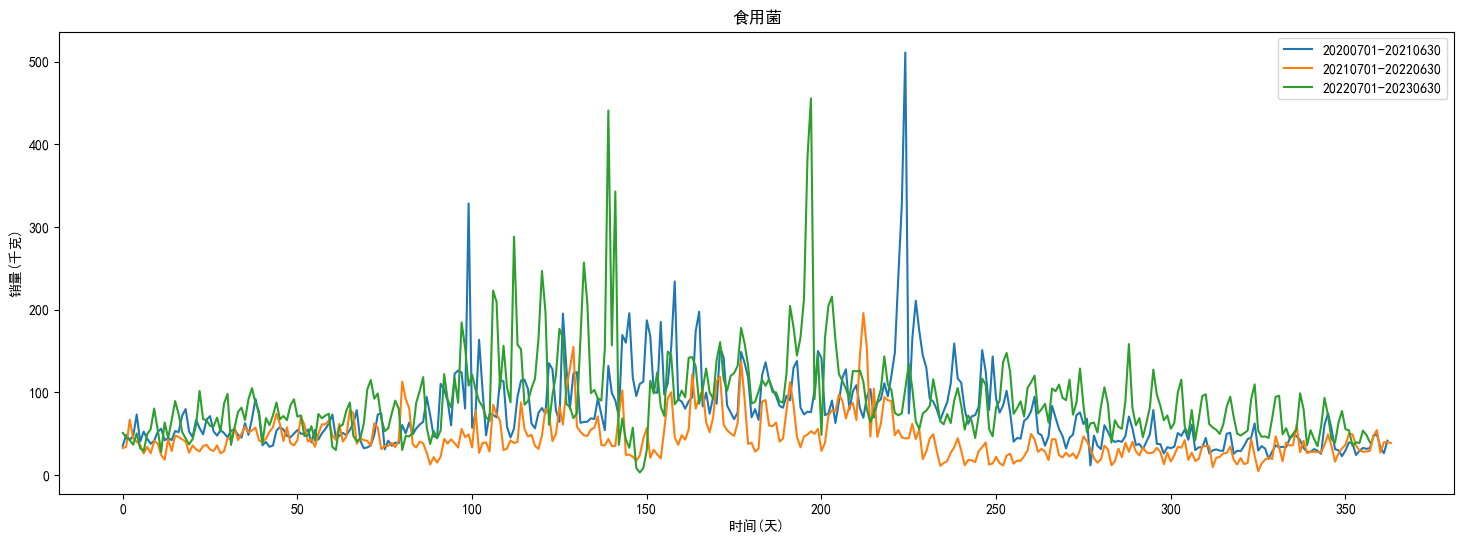

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 读取csv文件并转换为DataFrame对象
df = dataset
# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出指定品类的数据
category = '食用菌'
df_category = df.query('分类名称 == @category')

# 按年份和日期对数据进行分组，并计算每个组的销售总量
result = pd.DataFrame(df_category.groupby([df_category['日期'].dt.date])['销量(千克)'].sum())


res1=(result.loc[pd.to_datetime('2020-07-01'):pd.to_datetime('2021-06-30')].reset_index())[['销量(千克)']]
res2=(result.loc[pd.to_datetime('2021-07-01'):pd.to_datetime('2022-06-30')].reset_index())[['销量(千克)']]
res3=(result.loc[pd.to_datetime('2022-07-01'):pd.to_datetime('2023-06-30')].reset_index())[['销量(千克)']]


# 绘制折线图
plt.figure(figsize=(18,6))
plt.plot(res1)
plt.plot(res2)
plt.plot(res3)
plt.title(category)
plt.xlabel('时间(天)')
plt.ylabel('销量(千克)')
plt.legend(['20200701-20210630','20210701-20220630','20220701-20230630'])
plt.show()

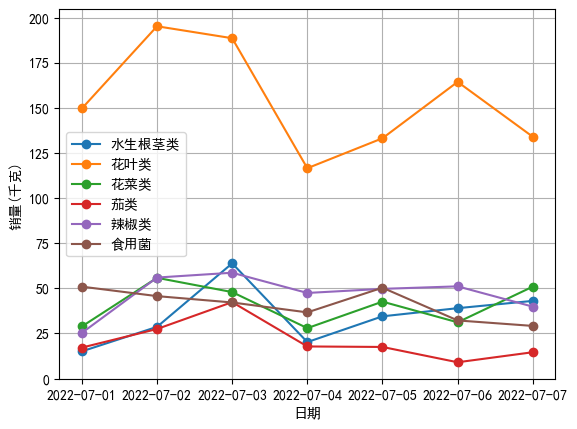

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件并转换为DataFrame对象
df = dataset

# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出每年7月1日到7月7日的数据
mask = ((df['日期'].dt.month == 7) & (df['日期'].dt.day >= 1) 
        & (df['日期'].dt.day <= 7) & (df['日期'].dt.year ==2022))
df = df.loc[mask]

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['分类名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 绘制折线图
for name, group in result.groupby('分类名称'):
    plt.plot(group['日期'], group['销量(千克)'], label=name,marker='o')

plt.legend()
plt.grid()
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.show()